<AxesSubplot: xlabel='Price', ylabel='Title'>

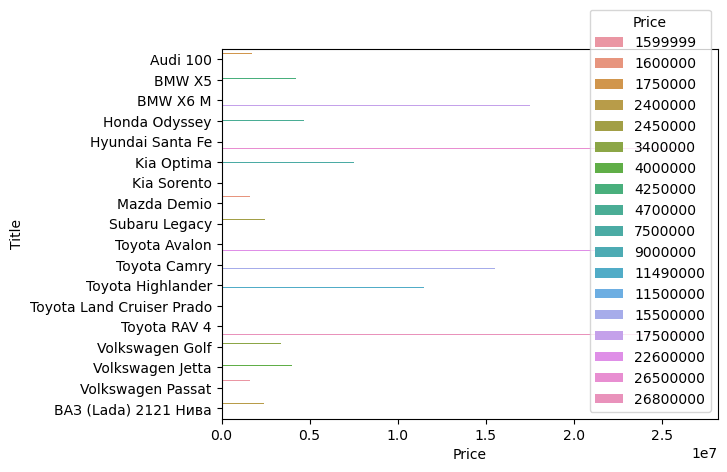

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from binascii import hexlify
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

total = 10
page = 1
baseUrl = 'https://kolesa.kz/cars/?price[from]=1000000'

carsCount = 0
titles = []

data = {'Title': [], 'Price': []}

while carsCount < total:
    url = f'{baseUrl}&page={page}'
    html = urlopen(url)

    if html.status != 200:
        break

    soup = BeautifulSoup(html.read().decode('utf-8', 'ignore'))
    cars = soup.findAll('div', {'class': 'a-card'})

    for car in cars:
        title = car.find('h5', {'class': 'a-card__title'}).find('a', {'class': 'a-card__link'}).text.strip()
        priceTitle = car.find('span', {'class': 'a-card__price'}).text.strip()
        price = int(''.join(filter(str.isdigit, priceTitle.replace('\xa0', ''))))
        
        if title in titles:
            continue

        titles.append(title)

        data['Title'].append(title)
        data['Price'].append(price)
        carsCount = carsCount + 1

    page = page + 1

df = pd.DataFrame(data)
df = df.groupby(['Title', 'Price']).agg(mean=("Price", 'mean'))
df = df.reset_index()

sns.barplot(x="Price",
            y="Title",
            hue="Price",
            data=df)
